<a href="https://colab.research.google.com/github/boriskuchin/MADMO-BASE-2024/blob/main/02_python_basics_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Как хранятся переменные в Python?

Переменные в Python отличаются от переменных в других ЯП:
- переменные в других ЯП - "коробочки" с данными
- переменные в Python - имена, указывающие (ссылающиеся) на отдельные области (объекты) в оперативной памяти

>Здесь мы переключаемся на доску, на ней проще нарисовать и объяснить будет.

Все переменные (а точнее даже типы данных) в Python делятся на 2 типа:

- **неизменяемые** - при попытке изменить переменную (присвоить новое значение) выделяется новая ячейка, в нее записывается новое значение и на нее теперь ссылается имя переменной
- **изменяемые** - при попытке изменить переменную новое значение записывается в ту же область памяти

**Неизменяемые типы данных** - все числовые типы (`int`, `float`, `bool`, ...), строки, кортежи.

**Изменяемые типы данных** - списки, множества, словари

При работе с переменными очень поможет функция `id` - она позволяет узнать адрес переменной в оперативной памяти.

С ее помощью можно понять, на какой участок оперативной памяти ссылается переменная.

Также очень полезен оператор `is` - проверяет не только равенство значений, но и `id` двух переменных.

## Тонкости работы с изменяемыми типами данных

**Внимание!**

Если вы создаете новую переменную, равную другой изменяемой переменной, например:

```python
a = [1, 2, 3]
a = b
```

то обе переменные будут ссылаться на ту же область оперативной памяти. В результате изменение одной переменной повлечет за собой изменение и другой переменной.

Пример:

In [ ]:
x = [1, 2, 3]
y = x

In [ ]:
x.append(4.0)
x

[1, 2, 3, 4.0]

In [ ]:
y

[1, 2, 3, 4.0]

Для проверки ссылаются ли переменные на одну и ту же область памяти удобно использовать функцию `id`:

In [ ]:
id(x) == id(y)

True

При изменении списка его `id` не меняется, т.е. он остается в той же области памяти:

In [ ]:
id(x)

137771522125696

In [ ]:
x.append("new_el")
id(x)

137771522125696

Если необходимо скопировать **плоский** список, удобно использовать срезы:

In [ ]:
y = x[:]
x


[1, 2, 3, 4.0, 'new_el']

In [ ]:
y

[1, 2, 3, 4.0, 'new_el']

In [ ]:
id(x) == id(y)

False

Проблемы вознимают, если ваш список (или другая изменяемая переменная) хранит в себе другое изменяемое значение.

### Глубокое копирование

Способ копирования через срезы подходит для копирования списков, содержащих только базовые типы данных (`int`, `float` и т.д.).

Что будет, если список хранит в себе, например, другой список:

In [ ]:
x = [1, 2, 3, [4]]

y = x[:]
print(x)
print(y)
print(id(x) == id(y))

[1, 2, 3, [4]]
[1, 2, 3, [4]]
False


In [ ]:
x[0] = 2
print(x)
print(y)
print(id(x) == id(y))

[2, 2, 3, [4]]
[1, 2, 3, [4]]
False


In [ ]:
x[-1].append(5)
print(x)
print(y)
print(id(x) == id(y))

[2, 2, 3, [4, 5]]
[1, 2, 3, [4, 5]]
False


Т.е. список не скопировался - все так же ссылаемся на одну и ту же область в памяти. Чтобы создать полную (глубокую) копию, воспользуемся функцией `deepcopy` из модуля `copy`:

In [ ]:
from copy import deepcopy

x = [1, 2, 3, [4]]
y = deepcopy(x)

x[-1].append(5)
print(x)
print(y)
print(id(x) == id(y))

[1, 2, 3, [4, 5]]
[1, 2, 3, [4]]
False


In [ ]:
a = [0] * 10
a

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
a[1] = 10
a

[0, 10, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
b = [[0] * 10] * 10
b

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [ ]:
b[3][7] = -42
b

[[0, 0, 0, 0, 0, 0, 0, -42, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, -42, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, -42, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, -42, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, -42, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, -42, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, -42, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, -42, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, -42, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, -42, 0, 0]]

## Изменение элементов с помощью циклов `for`

Мы научились получать доступ к элементам с помощью цикла `for` и переменной `item`. Посмотрим, можем ли мы так же и изменять элементы:

In [ ]:
d = [1, 2, 3, 4, 5]

for item in d:
    item = 0
    print(item)

print(d)

0
0
0
0
0
[1, 2, 3, 4, 5]


In [ ]:
d = [[1], [2], [3], [4], [5]]

for item in d:
    item = 0
    print(item)

print(d)

0
0
0
0
0
[[1], [2], [3], [4], [5]]


In [ ]:
d = [[1], [2], [3], [4], [5]]

for item in d:
    item.append(0)
    print(item)

print(d)

[1, 0]
[2, 0]
[3, 0]
[4, 0]
[5, 0]
[[1, 0], [2, 0], [3, 0], [4, 0], [5, 0]]


**Почему так происходит?** Команда `item = 0` означает, что имя `item` будет теперь ссылаться на область памяти, где записано число 0. Чтобы сделать так, чтобы `d[i]` ссылалось на число 0, необходимо указать `d[i] = 0`.

Но несмотря на то, что присвоить новое значение мы не можем, мы можем изменить элементы списка с помощью методов, доступных для этих элементов:

In [ ]:
d = [[1], [2], [3], [4], [5]]

for item in d:
    item.append(0)

print(d)

[[1, 0], [2, 0], [3, 0], [4, 0], [5, 0]]


Как быть, если мы все же хотим выполнить операцию присвоения? Остается только обращаться к элементам по индексу.

In [ ]:
d = [[1], [2], [3], [4], [5]]

i = 0
while i < len(d):
    d[i] = 0
    print(d[i])
    i += 1

print(d)

0
0
0
0
0
[0, 0, 0, 0, 0]


Но подождите, список может быть произвольной длины. Как мы можем получить список чисел от нуля до длины списка, чтобы изменить элементы списка по всем доступным индексам?

# Функции


## Основной синтаксис

Объявление функции в Python выглядит следующим образом:

```python
def function_name(args):
    something()
    return something_else
```

Разберем отдельные элементы:
- `def` - ключевое слово, показывает, что начинается объявление (definition) функции
- `function_name` - имя функции, по которому мы сможем ее вызывать
- `args` - аргументы, которые принимает наша функция (эти переменные доступны только внутри функции!). В обычном Python не указываются типы принимаемых аргументов (по-умолчанию принимаются все).
- `something()` - произвольные команды, выполняемые при вызове нашей функции
- `return` - ключевое слово, указывающее что будет возвращать функция. Может отсутствовать, тогда функция ничего не вернет, а точнее вернет ничего - `None`.

Если не указать скобки, но Python будет рассматривать функцию как объект ("переменную"):

In [ ]:
def sum_of_two_args(a, b):
    summ = a + b
    print("Result:", summ)
    return summ

In [ ]:
print(sum_of_two_args)

<function sum_of_two_args at 0x7fa1251bd090>


In [ ]:
s = sum_of_two_args

In [ ]:
s(19, 20)

Function received a = 19 b = 20


39

## Аргументы по умолчанию

Для аргумента можно задать значение по умолчанию. Тогда если при вызове функции не было передано значение, оно будет установлено автоматически:

In [ ]:
def sum_of_two_args_verbose(a, b, verbose=False):
    """
    This function returns sum of two arguments
    """
    summ = a + b
    if verbose:
        print("Function received a =", a, "b =", b, "summ = ", summ)

    return summ

In [ ]:
e = sum_of_two_args_verbose(10, 19)
print(e)

29


Как было сказано ранее, функция принимает любые типы данных, поэтому можем передать в нашу функцию и `str`:

In [ ]:
sum_of_two_args_verbose('10', "19", verbose=False)

'1019'

In [ ]:
help(sum_of_two_args_verbose)

Help on function sum_of_two_args_verbose in module __main__:

sum_of_two_args_verbose(a, b, verbose=False)
    This function returns sum of two arguments



## Возвращаемое значение

Как было сказано ранее, функция в Python может ничего не возвращать, если в теле функции отсутствует команда `return`:

In [ ]:
def sum_of_two_args_none(a, b):
    summ = a + b
    print("Result:", summ)

In [ ]:
result = sum_of_two_args_none(15, 10)
print(result, type(result))

Result: 25
None <class 'NoneType'>


Функции в Python могут возвращать и несколько значений:

In [ ]:
def sum_of_three_args(a, b, c):
    return a + b, b + c, a + c
    #return (a + b, b + c, a + c)

In [ ]:
result1, result2, result3 = sum_of_three_args(10, 20, 30)
print(result1, result2, result3)

30 50 40


По сути такая функция возвращает кортеж из нескольких элементов, а затем мы выполняем операцию множественного присвоения. Проверим:

In [ ]:
result = sum_of_three_args(10, 20, 30)
print(result, type(result))

(30, 50, 40) <class 'tuple'>


Единственное использование нескольких `return` - внутри разных веток условного оператора:

In [ ]:
def sum_of_three_args_condition(a, b, c):
    if a > b:
        print("Before 1st return")
        return a + b, b + c, a + c
    else:
        print("Before 2nd return")
        return 2*(a + b), 2*(b + c), 2*(a + c)

In [ ]:
sum_of_three_args_condition(3, 2, 3)

Before 1st return


(5, 5, 6)

In [ ]:
sum_of_three_args_condition(2, 2, 3)

Before 2nd return


(8, 10, 10)

Функцию выше можно переписать, слегка улучшив читаемость:

In [ ]:
def sum_of_three_args_condition_alter(a, b, c):
    if a > b:
        print("Before 1st return")
        return a + b, b + c, a + c
    print("Before 2nd return")
    return 2*(a + b), 2*(b + c), 2*(a + c)

## Передача аргументов при вызове функции

**Вопрос** - при вызове функции аргументы передаются в нее по ссылке (работаем с тем же объектом в памяти) или по значению (копируем объект)?

In [ ]:
a = [1]
b = [2, 3]

In [ ]:
sum_of_two_args(a, b)

Result: [1, 2, 3]


[1, 2, 3]

**Ответ** - изменяемые аргументы передаются по ссылке, неизменяемые передаются по значению.

Рассмотрим пример. Создадим функцию, которая принимает 2 аргумента (число и словарь) и меняет их внутри себя:

In [ ]:
from copy import deepcopy

def get_my_hero_team(team, number):
    number = 10
    team['Chuck'] = 'Norris'
    team['Sylvester'] = 'Stallone'

Проверим работу такой функции:

In [ ]:
number = 5  # immutable == неизменяемый
hero_team = {'Bruce': 'Willis', 'Chuck': 'Lorre'}  # mutable == изменяемый

get_my_hero_team(hero_team, number)

Посмотрим как поменялись значения наших переменных `number_value` и `hero_team`:

In [ ]:
number

5

In [ ]:
hero_team

{'Bruce': 'Willis', 'Chuck': 'Norris', 'Sylvester': 'Stallone'}

Как видим, `number_value` не изменился (значит передался по значению), а `hero_team` изменился (передался по ссылке).

## Переменное число аргументов

Функции в Python могут принимать при вызове не только фиксированное, но и переменное число элементов.

Для этого используется **операторы распаковки** `*` и `**`, которые распаковывают список / кортеж и словарь. Продемонстрируем это на примере:

In [ ]:
test_list = ['1', 1, False, [3], -5+1j]
print(test_list)

['1', 1, False, [3], (-5+1j)]


Получаем вывод с скобочками, а хотим вывести элементы по отдельности. Очевидный вариант - перечислить с помощью порядковых номеров:

In [ ]:
print(test_list[0], test_list[1], test_list[2], test_list[3], test_list[4])

1 1 False [3] (-5+1j)


Но этот способ не подходит, если заранее не знаем количество элементов. Здесь и поможет оператор распаковки:

In [ ]:
print(*test_list)

1 1 False [3] (-5+1j)


Т.е. оператор распаковки `*` преобразует список / кортеж в набор позиционных аргументов.

Оператор распаковки `**` действует аналогично для словаря, но преобразует его в набор ключевых аргументов.

In [ ]:
test_dict = {"sep": "\n", 'end': 'END OF PRINT'}
print("Hello, world!", "This is my first program!", **test_dict)

Hello, world!
This is my first program!END OF PRINT

In [ ]:
print("Hello, world!", "This is my first program!", sep="\n", end='END OF PRINT')

Hello, world!
This is my first program!END OF PRINT

Оператор распаковки также применяют, когда количество возвращаемых переменных функцией неизвестно или переменно:

In [ ]:
def echo(input_list):
    return input_list

In [ ]:
test_list = [1, 1, 2, 3, 5, 8, 13]
print(echo(test_list))

[1, 1, 2, 3, 5, 8, 13]


In [ ]:
result_first, result_second, *result_other = echo(test_list)
print(result_first, result_second, result_other)

1 1 [2, 3, 5, 8, 13]


В `result_other` может попасть и 0 переменных:

In [ ]:
test_list_shorter = test_list[:2]

result_first, result_second, *result_other = echo(test_list_shorter)
print(result_first, result_second, result_other)

1 1 []


In [ ]:
a, b, *c = (1, 2, 3, 4, 5)

Однако, остальные переменные обязательно должны быть заполнены:

In [ ]:
test_list_shortest = test_list[:1]

result_first, result_second, *result_other = echo(test_list_shortest)
print(result_first, result_second, result_other)

ValueError: ignored

Операторы распаковки можно использовать и при объявлении функции, чтобы она могла принимать произвольное количество аргументов

Рассмотрим пример оператора `*` и позиционных аргументов:

In [ ]:
def sum_many(*custom):
    print("Input elements:", custom, type(custom))
    if len(custom) > 0:
        print("First element:", custom[0])
    return sum(custom)

In [ ]:
sum_many(1, 2, 3)

Input elements: (1, 2, 3) <class 'tuple'>
First element: 1


6

In [ ]:
sum_many(1, 2, 3, 4, 5, 6, 7, 8)

Input elements: (1, 2, 3, 4, 5, 6, 7, 8) <class 'tuple'>
First element: 1


36

In [ ]:
sum_many()

Input elements: () <class 'tuple'>


0

Аналогично и для оператора `**` и ключевых аргументов:

In [ ]:
def print_keyword_args(**kwargs):
    print("Input kwargs:", kwargs)
    print("Answer:", kwargs.get("answer", "Not Found"))

In [ ]:
print_keyword_args(a=1, b=[2], answer=42)

Input kwargs: {'a': 1, 'b': [2], 'answer': 42}
Answer: 42


In [ ]:
print_keyword_args(a=1, b=2)

Input kwargs: {'a': 1, 'b': 2}
Answer: Not Found


Таким образом, можем объявить функцию, которая принимает любое количество любых аргументов:

In [ ]:
def uberfunc(*args, **kwargs):
    print('args =', args, 'kwargs =', kwargs)

In [ ]:
uberfunc()

args = () kwargs = {}


In [ ]:
uberfunc(1, 2, 3, a=4)

args = (1, 2, 3) kwargs = {'a': 4}


In [ ]:
uberfunc(answer=42)

args = () kwargs = {'answer': 42}


Таким образом, порядок объявления аргументов при создании функции выглядит следующим образом:

`def foo([positional_args, [positional_args_with_default, [*pos_args_name, [keyword_only_args, [**kw_args_name]]]]])`

In [ ]:
def foo(a, b=10, *args, c, d=10, **kwargs):
    print(args)
    print(sum(kwargs.values()))
    return a + b + sum(args) + c + d + sum(kwargs.values())

In [ ]:
arg1, arg2 = 10, 10

In [ ]:
result = foo(10, 20, arg1, arg2, c=10, arg3=10, arg4=10)
print(f'result = {result}')

(10, 10)
20
result = 90


In [ ]:
result = foo(10, arg1, arg2, c=10, arg3=10, arg4=10)
print(f'result = {result}')

(10,)
20
result = 70


In [ ]:
result = foo(10, c=10, arg3=10, arg4=10)
print(f'result = {result}')

()
20
result = 60


In [ ]:
sample_dct = {'arg3': 25, 'arg4': 25, 'd': 25}
sample_dct

{'arg3': 25, 'arg4': 25, 'd': 25}

In [ ]:
result = foo(10, arg1, arg2, c=10, **sample_dct)
print(f'result = {result}')

(10,)
50
result = 115


In [ ]:
def foo1(a, b=10, *name_for_pos_args, c, d=10, **name_for_kwargs):
    print(name_for_pos_args)
    print(sum(name_for_kwargs.values()))
    print("d =", d)
    return a + b + sum(name_for_pos_args) + c + d + sum(name_for_kwargs.values())

foo1(10, 10, arg1, arg2, c=10, **sample_dct)

(10, 10)
50
d = 25


125

In [ ]:
sample_dct = {'arg3': 25, 'arg4': 25, 'd': 25, 'c': 25}
sample_dct

{'arg3': 25, 'arg4': 25, 'd': 25, 'c': 25}

In [ ]:
foo1(10, 10, arg1, arg2, **sample_dct)

(10, 10)
50
d = 25


140

[Звездочки в питоне - как они используются](https://tproger.ru/translations/asterisks-in-python-what-they-are-and-how-to-use-them/)

# Анонимные функции

**Анонимная функция** - особый вид функций, которые объявляются в месте использования и не получают уникального идентификатора (имени) для доступа к ним.

Реализована в Python как **лямбда-функция**. Лямбда-функция может принимать любое кол-во аргументов, но имеет только одно выражение, которое и возвращает при вызове.

Основной синтаксис лямбда-функции выглядит следующим образом:

```python
lambda x: command()
```

Помимо отсутствия имени, отличительной чертой лямбда-функции является то, что она содержит в себе только одно выражение, которое и будет возвращать при вызове.

Создадим анонимную функцию и запишем ее в переменную:

In [ ]:
f_lambda = lambda x: print(x, end='EOL')

Проверим, что мы действительно создали функцию:

In [ ]:
type(f_lambda)

function

Проверим как работает наша лямбда-функция:

In [ ]:
f_lambda("Hello!")

Hello!EOL

Записав нашу лямбда-функцию в переменную мы ей как бы дали имя, на практике так не делают - это лишь демонстрация.

Созданная нами функция полностью эквивалентна следующей обычной (именованной) функции:

In [ ]:
def f(x):
    return print(x, end='EOL')

In [ ]:
f("Hello!")

Hello!EOL

Как и обычная функция, лямбда-функция может принимать на вход несколько аргументов, указывать значения по-умолчанию:

In [ ]:
(lambda x, y=4: x + y)(10, 13000)

13010

In [ ]:
(lambda x, y=4: x + y)(10)

14

In [ ]:
(lambda x, y=4, *args: x + y + sum(args))(10, 13000, 4, 100)

13114

В примерах выше мы сразу создали и вызвали лямбда-функцию.

## Применения лямбда-функций

**Зачем нужны лямбда-функции?** Некоторые функции принимают в качестве аргумента не обычную переменную, например, числовую или строку, а другую функцию. Эта переданная функция-аргумент используется для каких-либо вычислений внутри и обычно является достаточно простой.

Ярким примером такой функции является функция `sorted`. Она используется для сортировки контейнеров по возрастанию и по умолчанию для этого она сравнивает элементы контейнера между собой.

In [ ]:
test_list = [3, 14, 15, 2, 73]

In [ ]:
sorted(test_list)

[2, 3, 14, 15, 73]

Иногда в качестве элементов нашего сортируемого контейнера используются других контейнеры, например, кортежи и списки. Часто в таких случаях мы хотим выполнить нестандартную лексикографическую сортировку, а, например, сортировку по какому-либо конкретному индексу контейнера-элемента.

Разберем это на примере. Пусть имеем список `customer_data`, который содержит пары элементов (кортеж из двух элементов) "имя клиента", "полученный доход".

In [ ]:
customer_data = [("ivan", 2), ("george", 4), ("carl", 1), ("liz", 20), ("vlad", 10), ("dmitry", 10)]

Попробуем отсортировать этот список стандартным способом:

In [ ]:
sorted(customer_data)

[('carl', 1),
 ('dmitry', 10),
 ('george', 4),
 ('ivan', 2),
 ('liz', 20),
 ('vlad', 10)]

Сортировка выполнилась в первую очередь по первому полю (как и полагается лексикографически). Но нам бы хотелось отсортировать список по доходу с клиентов.

Здесь нам поможет один из необязательных аргументов функции `sorted` - `key`. Он принимает на вход функцию (не путать со значением/результатом функции), которая принимает один аргумент - элемент списка, и возвращает одно значение, по которому и будет выполняться сортировка.

В таких случаях, когда функция используется лишь один раз для небольшой работы, и применяют лямбда-функции. Выполним сортировку с использованием аргумента `key`:

In [ ]:
sorted(customer_data, key=lambda x: x[1])  # сортируем по элементу с индексом 1

[('carl', 1),
 ('ivan', 2),
 ('george', 4),
 ('vlad', 10),
 ('dmitry', 10),
 ('liz', 20)]

Это эквивалентно созданию именованной функции и ее указания в аргументах:

In [ ]:
def lambda_f(x):
    return x[1]

In [ ]:
sorted(customer_data, key=lambda_f)  # указываем имя функции, не вызывая ее

[('carl', 1),
 ('ivan', 2),
 ('george', 4),
 ('vlad', 10),
 ('dmitry', 10),
 ('liz', 20)]

Как видим, получили сортировку по элементу с индексом 1, но хотелось бы иметь сортировку по убыванию. Здесь нам может помочь другой аргумент - `reverse`, который позволяет выполнить сортировку по убыванию (в обратном порядке).

In [ ]:
sorted(customer_data, key=lambda x: x[1], reverse=True)

[('liz', 20),
 ('vlad', 10),
 ('dmitry', 10),
 ('george', 4),
 ('ivan', 2),
 ('carl', 1)]

Еще один способ выполнить сортировку по полю 1 по убыванию - изменить нашу лямбда-фукнцию:

In [ ]:
sorted(customer_data, key=lambda x: (-x[1], x[0]))

[('liz', 20),
 ('dmitry', 10),
 ('vlad', 10),
 ('george', 4),
 ('ivan', 2),
 ('carl', 1)]

Аналогично можно использовать и встроенные функции. Например, если хотим отсортировать список кортежей по минимальному элементу каждого кортежа:

In [ ]:
list_of_tuples = [(-2, 2000, 10), (100, 4), (13, 1), (42, 20)]

In [ ]:
sorted(list_of_tuples, key=min)

[(-2, 2000, 10), (13, 1), (100, 4), (42, 20)]

Еще одним примером встроенной функции, которая в качестве аргументов принимает другую функцию, является функция `map`.

Функция `map` позволяет применить одну функцию ко всем элементам контейнера:

In [ ]:
list(map(lambda x: x ** 2, [1,2,3]))

[1, 4, 9]

Функция `map` возвращает результат в специальном служебном типе данных, поэтому преобразуем его в список.

Один из частых сценариев применения функции `map` - считывание набора чисел, вводимых из строки.

Предположим, мы считали строку в переменную `input_str`:

In [ ]:
input_str = "123 456 123778 8898"

Затем можем разбить строку эту строку на отдельные элементы по пробелу:

In [ ]:
input_str_list = input_str.split(' ')
input_str_list

['123', '456', '123778', '8898']

In [ ]:
ints = []
for item in input_str_list:
    ints.append(int(item))
print(ints)

[123, 456, 123778, 8898]


Остается лишь преобразовать элементы из строкового типа в целочисленный:

In [ ]:
list(map(int, input().split(' ')))

123 456 87 90


[123, 456, 87, 90]

Эта операция эквивалентна:

In [ ]:
result = []
for item in input_str_list:
    result.append(int(item))
result

[123, 456, 123778, 8898]

In [ ]:
list(map(int, input().split()))

123 4 5 67 8 909


[123, 4, 5, 67, 8, 909]

# ООП-101

**Парадигма программирования** — совокупность идей и понятий, определяющих стиль написания компьютерных программ (подход к программированию).



**Парадигмы программирования:**
- **императивное программирование** - последовательность команд, которые выполняются одна за другой
- **процедурное программирование** - создание процедур и функций для сокращения дублирования кода
- **декларативное программирование** - фокус на то "что" должна делать программа, а не "как" (примерно как SQL)
- **функциональное программирование** - разбиение программы на функции, выход одной функции - выход другой
- **структурное программирование** - веха в области программирования, структурировали основные элементы написания программ - последовательность, ветвление (if/else), цикл while, подпрограммы (функции)
- **объектно-ориентированное программирование**

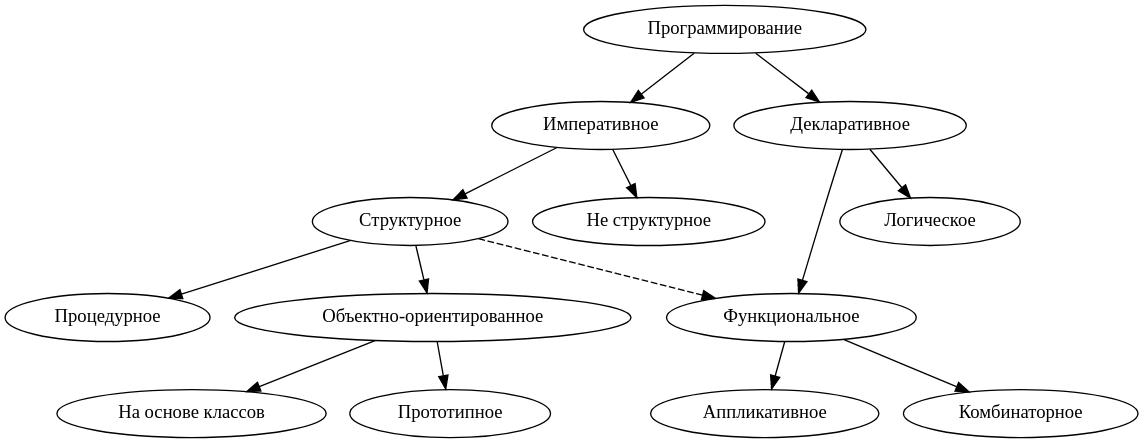

**Объектно-ориентированное программирование** - парадигма программирования, основанная на представлении программы в виде совокупности взаимодействующих объектов со своими свойствами и поведениями, каждый из которых является экземпляром определённого класса, которые образуют иерархию наследования.

**Основные термины в ООП:**
- Класс
- Объекты
- Абстракция
- Инкапсуляция
- Наследование
- Полиморфизм





## Объекты и классы

Основная идея ООП - выделить в программе отдельные сущности - объекты.

- **Примеры объектов из реальной жизни** - стол, чашка, человек, книга, здание и т.д.
- **Примеры объектов в программах** - пользователь, кнопка, сообщение.

Свойства объекта: (**атрибуты**, по сути переменные):
- цвет
- содержание
- имя пользователя

Возможные действия (**методы**, по сути функции):
- отправить сообщение
- нанять сотрудника
- нажать кнопку

Чтобы не создавать для каждого отдельного объекта свои методы (переиспользование кода), существуют классы.

**Класс** — это «шаблон» для объекта, который описывает его атрибуты и методы Каждый объект — это экземпляр какого-нибудь класса.

**Пример** - пишем систему учета сотрудников.

Создадим класс "Сотрудник" с атрибутами:
- ФИО
- должность
- подразделение
- руководитель
- зарплата

и методами:
- перевести в другой отдел
- повысить зарплату
- сменить должность
- уволить

Отдельный сотрудник, Вася Пупкин, является объектом - экземпляром класса "Сотрудник".

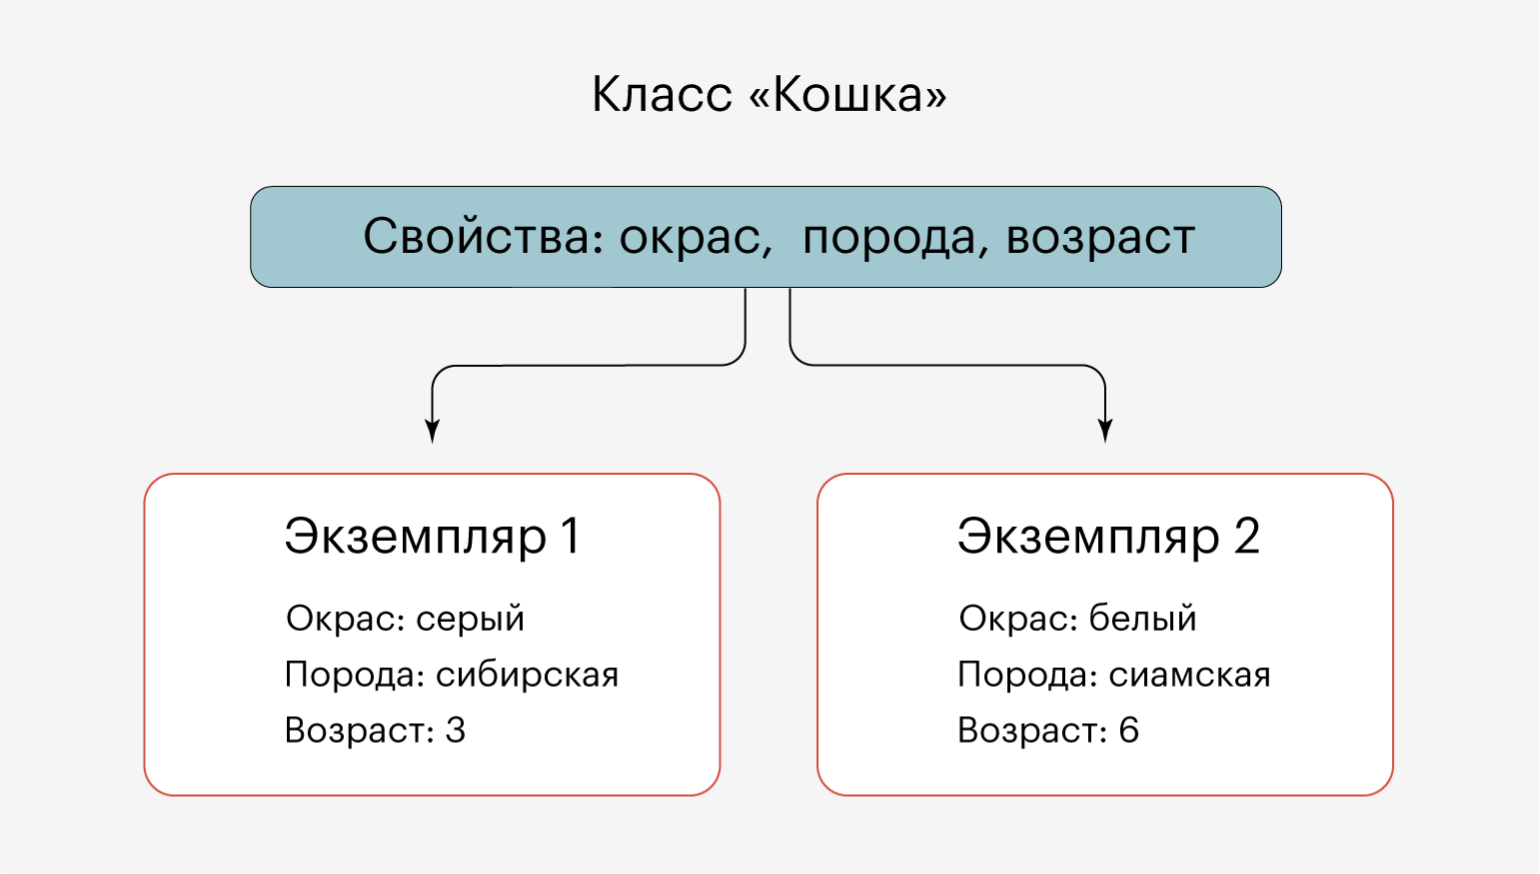

In [ ]:
class Cat():
    color = None
    breed = None
    age = None

# Экземпляр 1
Molly = Cat()

Molly.color = 'gray'
Molly.breed = 'Siberian'
Molly.age = 3

# Экземпляр 2
Jack = Cat()

Jack.color = 'white'
Jack.breed = 'Siam'
Jack.age = 6

## Абстракция

Абстрагирование — это способ выделить набор наиболее важных атрибутов и методов и исключить незначимые. Соответственно, абстракция — это использование всех таких характеристик для описания объекта. Важно представить объект минимальным набором полей и методов без ущерба для решаемой задачи.



**Пример:** объекту класса «программист» вряд ли понадобятся свойства «умение готовить еду» или «любимый цвет».

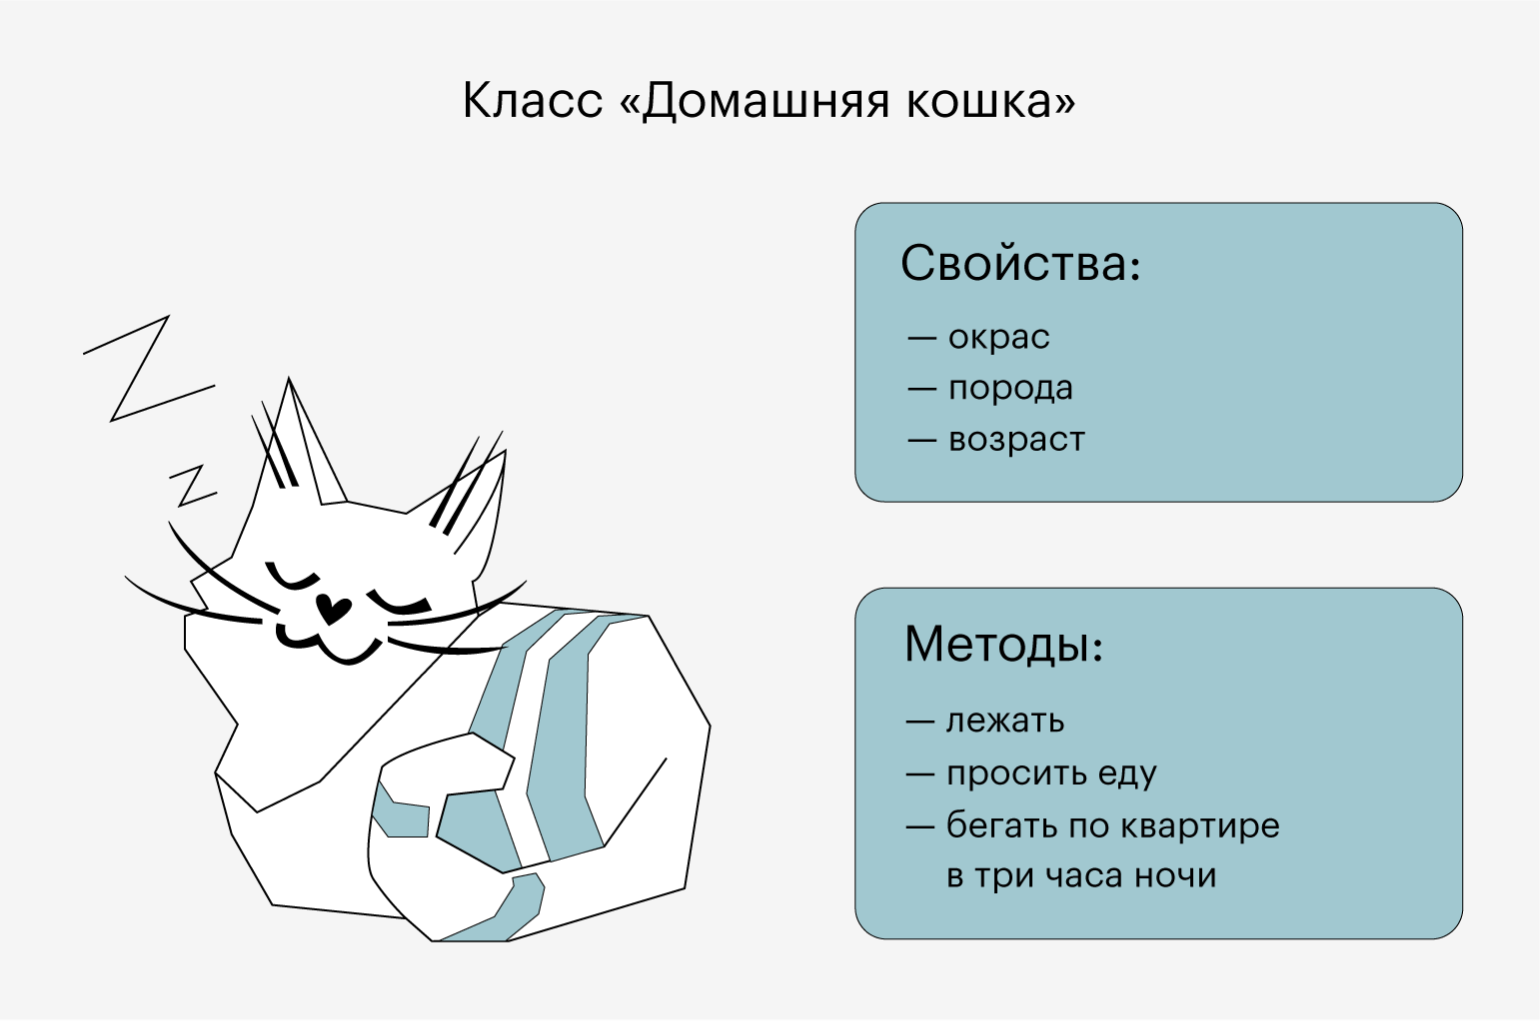

In [ ]:
class Cat():
    color = None
    breed = None
    age = None

    def lay():
        pass

    def askFood():
        pass

    def tigidic():
        pass

## Инкапсуляция

**Каждый объект — независимая структура.** Он содержит в себе все, что ему нужно для работы. Если ему нужна какая-либо переменная, она будет описана в теле объекта, а не наружном коде. Это делает объекты более гибкими. Даже если внешний код перепишут, логика работы не изменится.

Инкапсуляция позволяет спрятать от внешнего кода и других объектов детали реализации того или иного метода. Другим объектам не важно (и не нужно) знать как именно объект выполняет свою задачу, главное - что выполняет :)

Таким образом, внутреннее устройство одного объекта закрыто от других: извне «видны» только значения атрибутов и результаты выполнения методов.

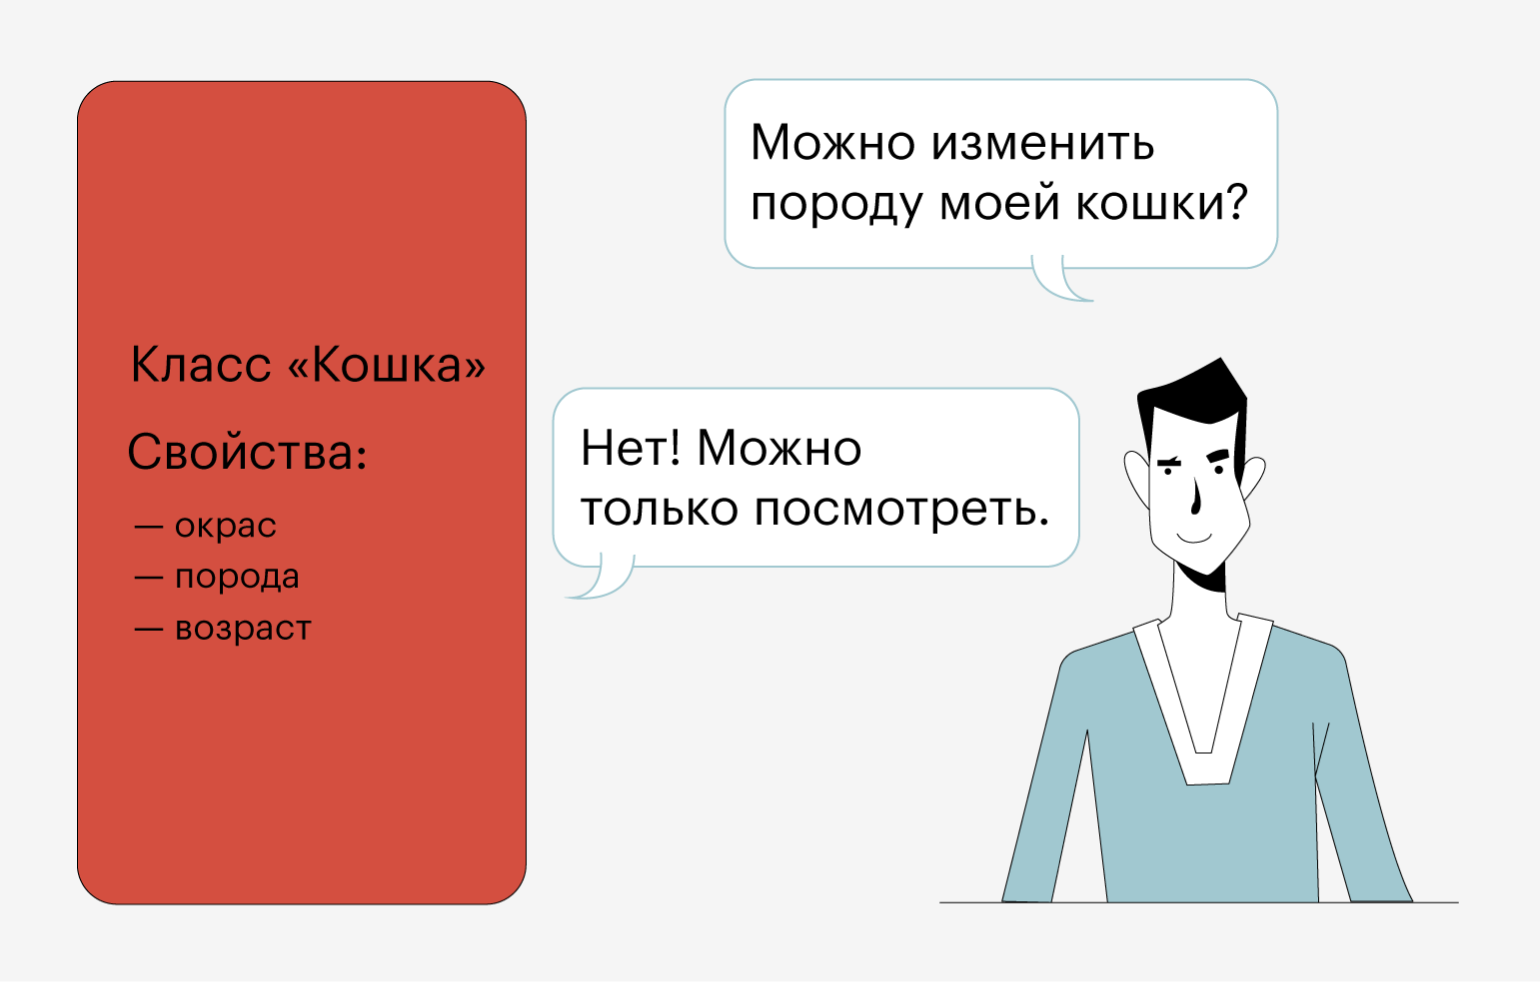

In [ ]:
class Cat():
    color = None
    breed = None
    age = None

    def lay():
        pass

    def askFood():
        pass

    def tigidic(self):
        self.__ночной_тыгыдык__()

    def __ночной_тыгыдык__():
        pass

## Наследование

Позволяет создавать классы и объекты, которые похожи друг на друга, но немного отличаются, например, имеют дополнительные атрибуты или другие методы. Более общий класс в таком случае становится «родителем», а более специфичный и подробный — «наследником».

**Пример** - класс "сотрудник" может иметь наследные классы "программист", "аналитик" и "тестировщик".

У одного "родителя" может быть несколько дочерних классов, у одного дочернего класса может быть и несколько родительских.

Наследование позволяет создавать сложные схемы с четкой иерархией "от общего к частному". Это облегчает понимание и масштабирование кода. Не нужно много раз переписывать в разных объектах одни и те же свойства. Достаточно унаследовать эти объекты от одного "родителя", и родительские свойства применятся автоматически.

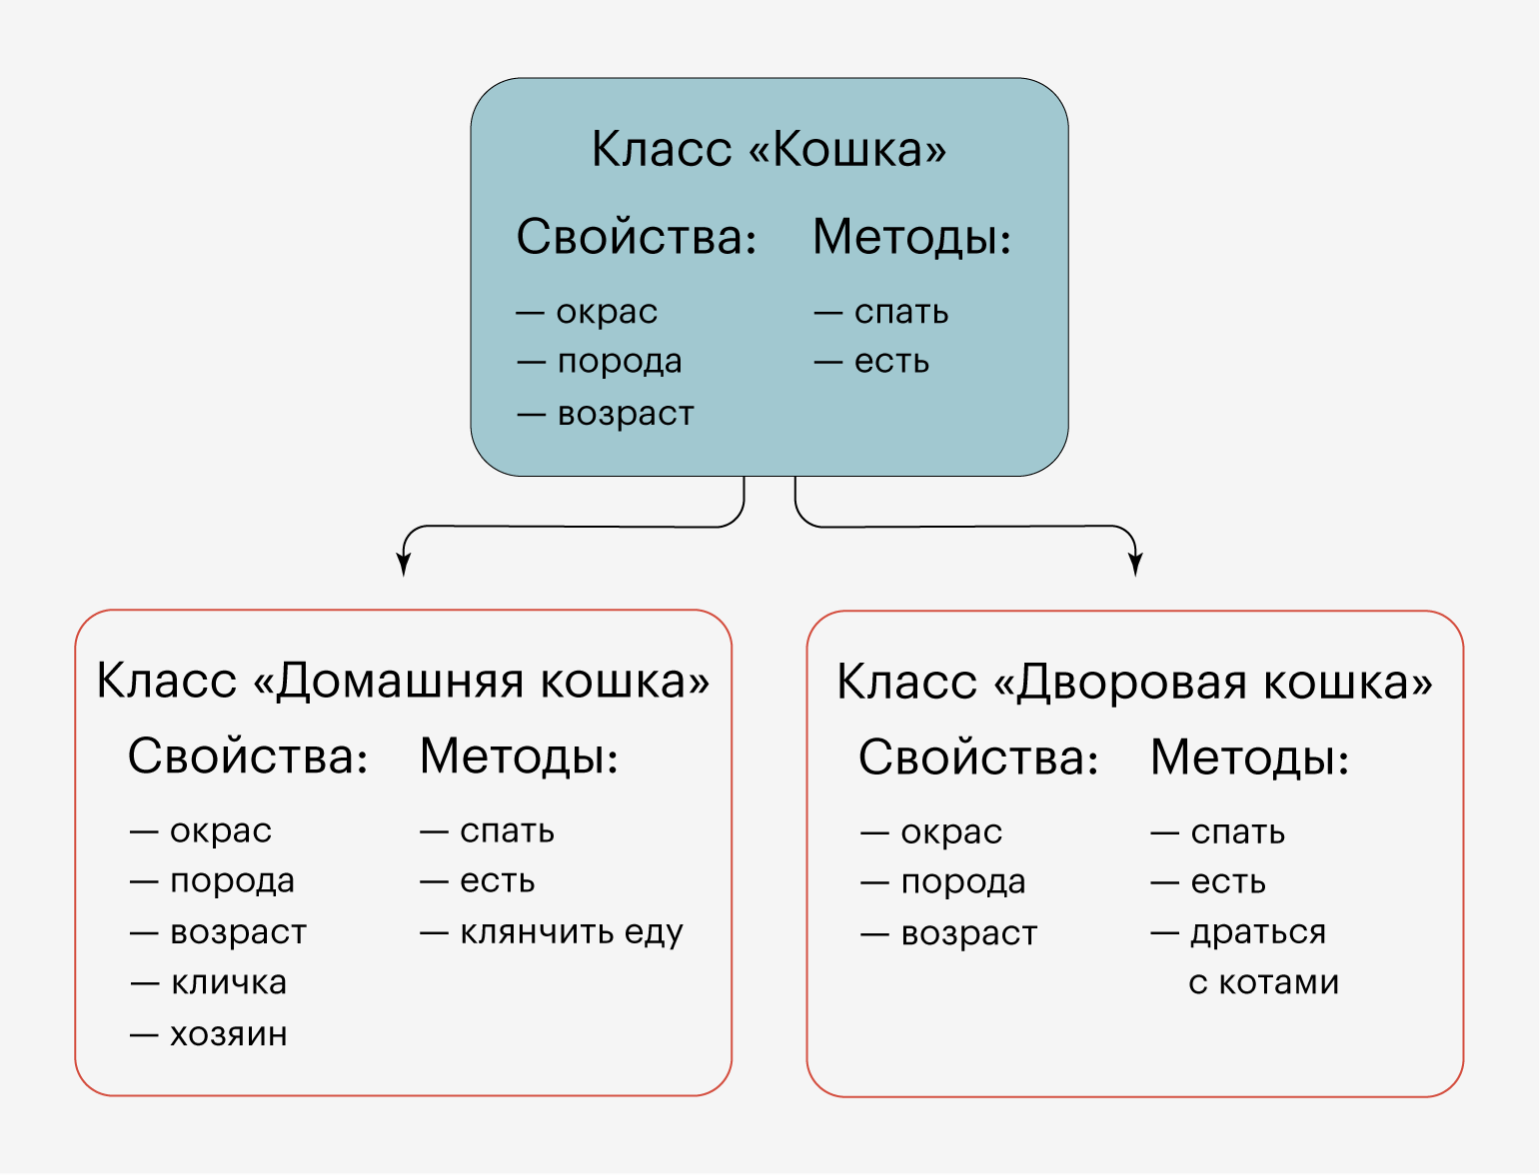

## Полиморфизм

Одинаковые методы разных классов могут выполнять задачи разными способами. Например, у "сотрудника" есть метод "работать". У "программиста" реализация этого метода будет означать написание кода, а у "тестировщика" — рассмотрение управленческих вопросов. Но глобально и то, и другое будет работой.

Тут важны единый подход и договоренности между специалистами. Если метод называется delete, то он должен что-то удалять. Как именно — зависит от объекта, но заниматься такой метод должен именно удалением. Более того: если оговорено, что «удаляющий» метод называется delete, то не нужно для какого-то объекта называть его remove или иначе. Это вносит путаницу в код.

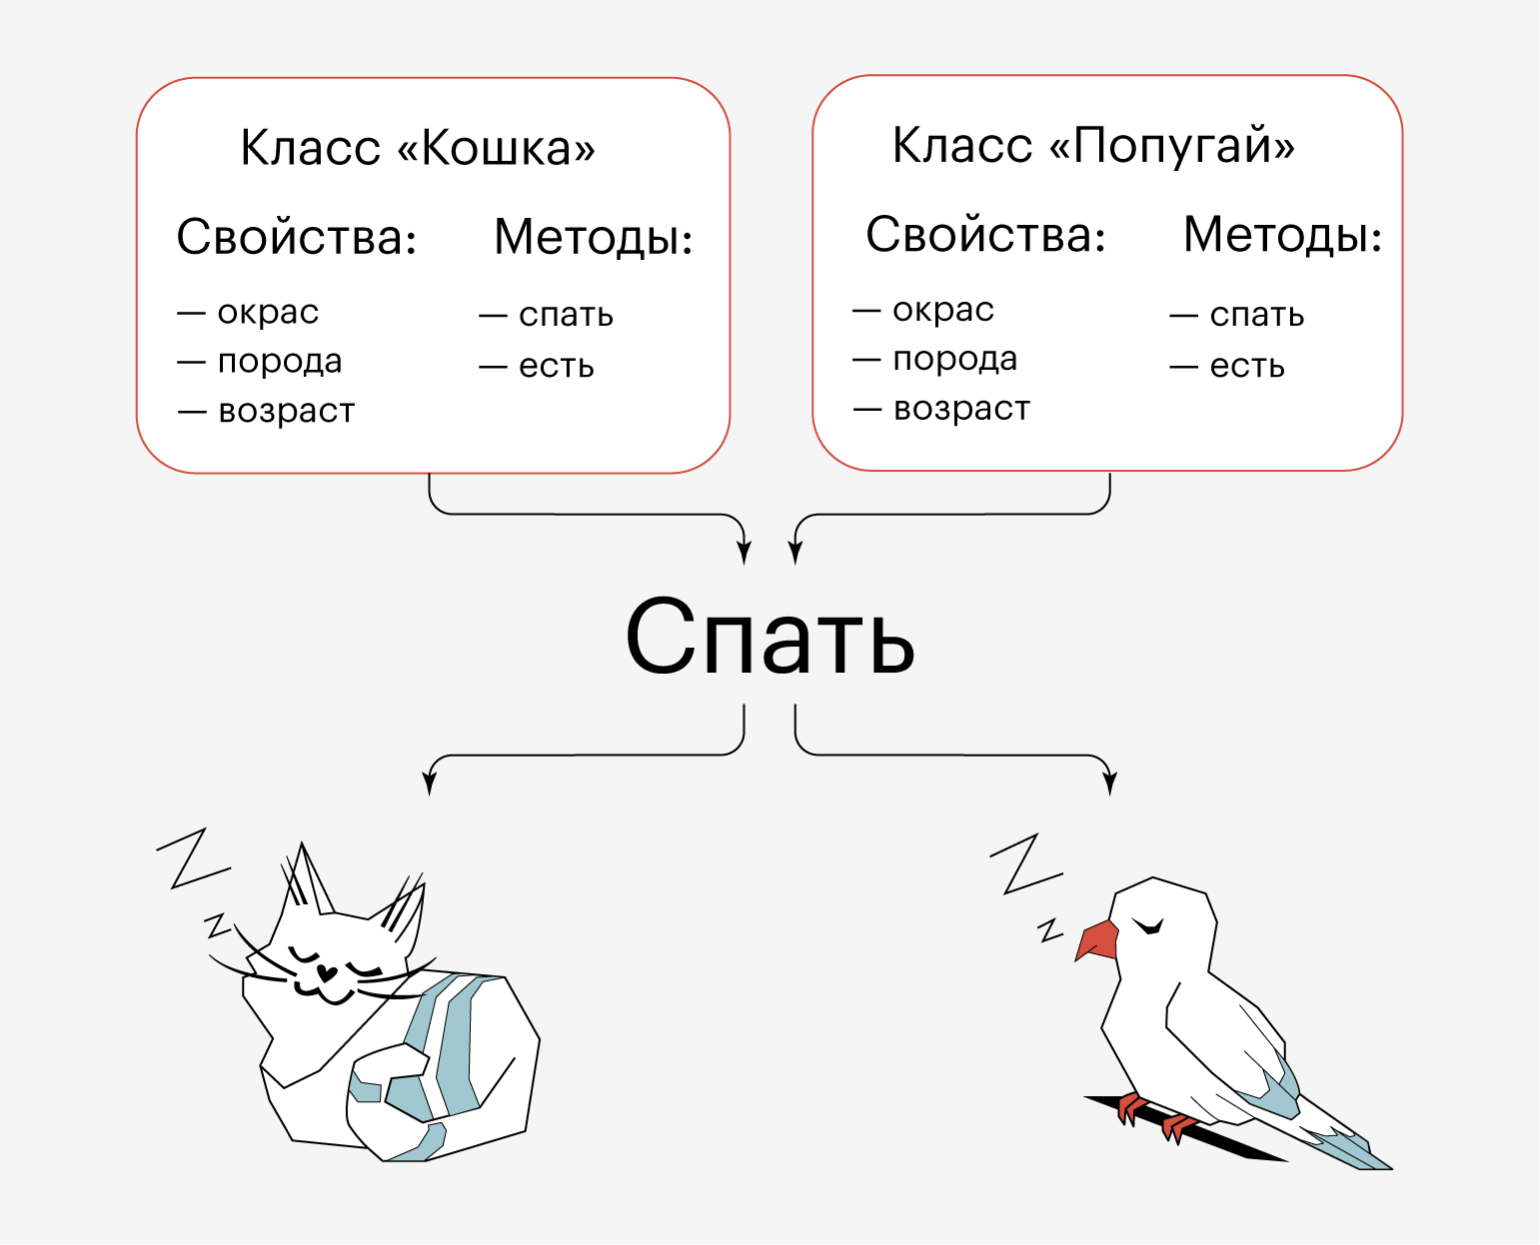

# ООП в Python

### Объявление класса и экземпляра

Создаим класс кошек и скажем что у каждой кошки есть цвет и она умеет мяукать.

In [ ]:
class Cat(object):
    color = 'Черный'

    def call(self):
        print('Myau!')

Создадим экземпляр кота Барсика. Он будет обладать полями класса и его методами.

In [ ]:
barsik = Cat()

barsik.call()
print('цвет кота: ', barsik.color)

Myau!
цвет кота:  Черный


Проверим тип нашего Барсика

In [ ]:
type(barsik)

__main__.Cat

Поробуем поменять цвет Барсика

In [ ]:
barsik.color = 'Рыжий'

barsik.color

'Рыжий'

Хорошим тоном будет создать get и set методы для нашего поля color

In [ ]:
class Cat(object):
    color = 'Черный'

    def call(self):
        print('Myau!')

    def get_color(self):
        return self.color

    def set_color(self, new_color):
        color = new_color

In [ ]:
barsik = Cat()

print(barsik.get_color())
barsik.set_color('Рыжий')
print(barsik.get_color())

Черный
Черный


Почему цвет не поменялся?
Заметим, что в get методе у нас используется обращение к полю цвета через self, это означает что мы обращаемся к полю **экземпляра**. Также нам стоит поступить и в set методе.

In [ ]:
class Cat(object):
    color = 'Черный'

    def call(self):
        print('Myau!')

    def get_color(self):
        return self.color

    def set_color(self, new_color):
        self.color = new_color

Но что такое self? self - ссылка на "себя", на экземпляр класса, который неявно передается в синтаксисе, когда мы вызываем метод от **экземпляра** класса.

---
```
barsik.set_color('Рыжий')
   ^                ^
  self           new_color
```

Также происходит и в get методе

---

```
barsik.get_color()
   ^                
  self
```

### Метод-конструктор

А если мы хотим определять не стандартный цвет для всех котов "черный", а задавать цвет при создании котика?

Для этого у нас есть **конструктор** класса. Больше не будем хранить поля класса, а только создавать их у **экземпляра** по мере необходимости.

In [ ]:
class Cat(object):
    # color = 'Черный'

    # Конструктор класса
    def __init__(self, name, color):
        self.name = name
        self.color = color

    def call(self):
        print('Myau!')

    def get_name(self):
        return self.name

    def get_color(self):
        return self.color

    def set_color(self, new_color):
        self.color = new_color

In [ ]:
barsik = Cat('Барсик', 'Рыжий')

# barsik = Cat()
# barsik.__init__('Барсик', 'Рыжий')
# Cat.__init__(barsik, ...)

print('Нашего кота зовут: ', barsik.get_name())
print('Его цвет: ', barsik.get_color())

Нашего кота зовут:  Барсик
Его цвет:  Рыжий


### Динамичность атрибутов

Мы можем создать дополнительное поле для нашего **объекта**, уже после его создания.

Допустим мы узнали возраст нашего кота.

In [ ]:
barsik = Cat('Барсик', 'Рыжий')

barsik.age = 8

На самом деле наш класс тоже является объектом и ему мы также можем динамически добавлять поля.

Вопрос в зал: "*Является ли метод полем класса?*"

In [ ]:
barsik = Cat('Барсик', 'Рыжий')

Cat.age = 42

*Что выведет следущая раскоменченная ячейка?*

In [ ]:
# barsik.age

Можем ли мы поменять голос Барсика уже после создания?

In [ ]:
def trueCall():
    print("ХОЧУ ЖРАТЬ !")

barsik.call = trueCall

In [ ]:
barsik.call()

ХОЧУ ЖРАТЬ !


Мы знаем, что функция - это объект, класс - это объект. экземпляр - это объект.

Опциональная загадка:* Что выведет следущая раскоменченная ячейка? *

In [ ]:
barsik = Cat('Барсик', 'Рыжий')

barsik.age = 8
Cat.age = 42

# print(barsik.age == Cat.age)

### Функция `dir`

Если мы можем менять поля объекта после его создания, как нам узнать о всех полях которые у него есть ?

У Барсика появились 100500 заслуг, которые он получил после создания

In [ ]:
barsik = Cat('Барсик', 'Рыжий')
barsik.age = 8
barsik.sex = 'Кот'
barsik.beuty = 20
barsik.call = trueCall

Мы можем вывести все поля объекта с помощью фунцкии `dir`

In [ ]:
dir(barsik)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'age',
 'beuty',
 'call',
 'color',
 'get_color',
 'get_name',
 'name',
 'set_color',
 'sex']

Для сравнения поля класса Cat не обладают теми полями, которые заслужил Барсик

In [ ]:
dir(Cat)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'age',
 'call',
 'get_color',
 'get_name',
 'set_color']

Составим список только вызываемых (callable) атрибутов объекта

In [ ]:
# оговорочка
# callable - отвечает является ли атрибут методом
callable(barsik.call), callable(barsik.color)

(True, False)

In [ ]:
# оговорочка
# getattr возвращает атрибут объекта по его имени
getattr(barsik, 'call')

<function __main__.trueCall()>

Вернем только методы Барсика

In [ ]:
[name for name in dir(barsik) if callable(getattr(barsik, name))]

['__class__',
 '__delattr__',
 '__dir__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'call',
 'get_color',
 'get_name',
 'set_color']

Исключим служебные методы

In [ ]:
def print_custom_attrs(obj=None):
    if obj is None:
        # в локальной области видимости!
        attrs = dir()
    else:
        attrs = dir(obj)
    print([name for name in attrs if not name.startswith('__')])  # Исключаем служебные методы

In [ ]:
print_custom_attrs(Cat)

['age', 'call', 'get_color', 'get_name', 'set_color']


In [ ]:
print_custom_attrs(barsik)

['age', 'beuty', 'call', 'color', 'get_color', 'get_name', 'name', 'set_color', 'sex']


In [ ]:
print_custom_attrs(Cat('Муся', "Белый"))

['age', 'call', 'color', 'get_color', 'get_name', 'name', 'set_color']


### Приватность атрибутов

Во многих языках программирования можно регулировать доступ до атрибутов класса от внешнего кода и других классов. Обычно выделяют три уровня доступа:

публичный - атрибуты доступны как внутри класса, так и из наружнего кода
защищенный - атрибуты доступны внутри класса и для наследников класса
приватный - атрибуты доступны только внутри класса
А есть ли в Python приватность атрибутов? Можем ли мы запретить читать и менять атрибуты объекта снаружи (внешним кодом)?

А есть ли в Python приватность атрибутов? Можем ли мы запретить читать и менять атрибуты объекта снаружи (внешним кодом)?

In [ ]:
class Cat(object):
    # Конструктор класса
    def __init__(self, name, color, age):

        # publick
        self.name = name
        self.color = color

        # protected
        self._age = age

        # private
        self.__is_well_fed = False

    def call(self):
        print('Myau!')

    def get_name(self):
        return self.name

    def get_color(self):
        return self.color

    def set_color(self, new_color):
        self.color = new_color

In [ ]:
barsik = Cat('Барсик', 'Рыжий', 9)

barsik.name

'Барсик'

In [ ]:
barsik._age

9

In [ ]:
barsik.__is_well_fed

AttributeError: 'Cat' object has no attribute '__is_well_fed'

Приватность существует ?

In [ ]:
barsik._Cat__is_well_fed

False

In [ ]:
barsik._Cat__is_well_fed = True
barsik._Cat__is_well_fed

True

## Наследование

Рассмотрим как работает наследование в Python с помощью следующих классов:

In [ ]:
class Animal:  # неявно наследуется от класса object
    some_value = "animal"

    def __init__(self):
        print("i am an animal")

    def speak(self):
        raise NotImplementedError('i don\'t know how to speak')  # ошибка, показывающая что метод еще не реализован

In [ ]:
class Cat(Animal):
    some_value = "cat"

    def __init__(self):
        super().__init__()
        print("i am a cat")

    def speak(self):
        print('meoooow')

In [ ]:
class Dog(Animal):
    some_value = "dog"

    def __init__(self):
        super().__init__()
        print("i am a dog")

In [ ]:
class Hedgehog(Animal):
    def __init__(self):
        super().__init__()
        print("i am a hedgehog")

In [ ]:
animal = Animal()
print(animal.some_value)
animal.speak()

i am an animal
animal


NotImplementedError: i don't know how to speak

In [ ]:
cat = Cat()

i am an animal
i am a cat


In [ ]:
cat.some_value # переопределено

'cat'

In [ ]:
cat.speak()

meoooow


In [ ]:
dog = Dog()

i am an animal
i am a dog


In [ ]:
dog.some_value # переопределено

'dog'

In [ ]:
dog.speak()

NotImplementedError: i don't know how to speak

In [ ]:
hedgehog = Hedgehog()

i am an animal
i am a hedgehog


In [ ]:
hedgehog.some_value

'animal'

In [ ]:
hedgehog.speak()

NotImplementedError: i don't know how to speak

Ромбовидное наследование возможно, но не делайте так, пожалуйста!

In [ ]:
#      Animal
#    /       \
#  Cat       Dog
#    \       /
#      CatDog

In [ ]:
class CatDog(Cat, Dog):
    def __init__(self):
        super().__init__()
        print("i am a CatDog!")

In [ ]:
catdog = CatDog()
catdog.some_value

i am an animal
i am a dog
i am a cat
i am a CatDog!


'cat'

Порядок перечисления родителей важен!

In [ ]:
class DogCat(Dog, Cat):  # теперь наоборот
    def __init__(self):
        super().__init__()
        print("i am a CatDog!")

dogcat = DogCat()
dogcat.some_value

i am an animal
i am a cat
i am a dog
i am a CatDog!


'dog'

Что с методами?

In [ ]:
CatDog.__mro__

(__main__.CatDog, __main__.Cat, __main__.Dog, __main__.Animal, object)

In [ ]:
DogCat.__mro__

(__main__.DogCat, __main__.Dog, __main__.Cat, __main__.Animal, object)

In [ ]:
class A: pass
class B(A): pass
class C: pass
class D(B, C): pass

D.__mro__

(__main__.D, __main__.B, __main__.A, __main__.C, object)

Множественное наследование здорового человека - mixins.

# Extra

Variable typing:
- annotations

In [ ]:
def two_sum(a, b):
    return a + b

In [ ]:
def two_sum(a: int, b: int) -> int:
    return a + b

In [ ]:
two_sum(1,2)

3

In [ ]:
help(two_sum)

Help on function two_sum in module __main__:

two_sum(a: int, b: int) -> int



In [ ]:
two_sum(1.,2.)

3.0

In [ ]:
two_sum('1','2')

'12'

In [ ]:
def two_sum(a: int, b: int) -> int:
    assert type(a) is int, 'a must be int!'
    assert type(b) in {int, float}, 'a must be int!'
    return a + b

In [ ]:
two_sum(1,2)

3

In [ ]:
two_sum(1.,2.)

AssertionError: a must be int!

Libs:
- attrs
- PyDantic

In [ ]:
class E:
    def __init__(self):
        raise Exception